# Projet d'économétrie, sujet A

In [1]:
%matplotlib inline

import numpy as np
from scipy import stats
import math
import pylab as pl
import seaborn as sns

## Question 1

> *Lire le fichier **mroz.txt**. Ne séléctionner que les observations pour lesquelles la variable **wage** est strictement positive.*

In [2]:
# Load raw file
def readRawData(filename='data/MROZ.raw'):
    f = open(filename, 'rb')
    res = ''
    try:
        byte = f.read(1)
        while byte != "":
            res += str(byte)
            byte = f.read(1)
    finally:
        f.close()
    # split data
    final_res = list()
    test = res.split('\r\n')
    for t in test:
        if len(t)>0:
            yo = filter(lambda a: a != '', t.split(' '))
            yoo = [x if x != '.' else 0 for x in yo]
            final_res.append([float(i) for i in yoo])    
    return np.array(final_res)  

#MROZ datas
#
#  Obs:   753
#
#  1. inlf                     =1 if in labor force, 1975
#  2. hours                    hours worked, 1975
#  3. kidslt6                  # kids < 6 years
#  4. kidsge6                  # kids 6-18
#  5. age                      woman's age in yrs
#  6. educ                     years of schooling
#  7. wage                     estimated wage from earns., hours
#  8. repwage                  reported wage at interview in 1976
#  9. hushrs                   hours worked by husband, 1975
# 10. husage                   husband's age
# 11. huseduc                  husband's years of schooling
# 12. huswage                  husband's hourly wage, 1975
# 13. faminc                   family income, 1975
# 14. mtr                      fed. marginal tax rate facing woman
# 15. motheduc                 mother's years of schooling
# 16. fatheduc                 father's years of schooling
# 17. unem                     unem. rate in county of resid.
# 18. city                     =1 if live in SMSA
# 19. exper                    actual labor mkt exper
# 20. nwifeinc                 (faminc - wage*hours)/1000
# 21. lwage                    log(wage)
# 22. expersq                  exper^2

In [3]:
mroz = readRawData()
datas = mroz[np.where(mroz[:,7]>0)] # select data where wage > 0

## Question 2

In [4]:
def descriptivStats(arr):
    d = {'min':0.0,'max':0.0,'mean':0.0,'median':0.0,'var':0.0,'std':0.0}
    d['min'] = np.min(arr)
    d['max'] = np.max(arr)
    d['mean'] = np.mean(arr)    
    d['median'] = np.median(arr)
    d['var'] = np.var(arr)
    d['std'] = np.std(arr)
    return d 

In [5]:
#descriptiv stats    
stats_age = descriptivStats(datas[:,5])
print stats_age
stats_educ = descriptivStats(datas[:,6])
print stats_educ
stats_wage = descriptivStats(datas[:,7])
print stats_wage
#stats sur les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon
women_stats1 = descriptivStats(datas[np.where(datas[:,12]>np.median(datas[:,12]))])
print women_stats1
#stats sur les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon
women_stats2 = descriptivStats(datas[np.where(datas[:,12]<np.median(datas[:,12]))])
print women_stats2

## Question 3

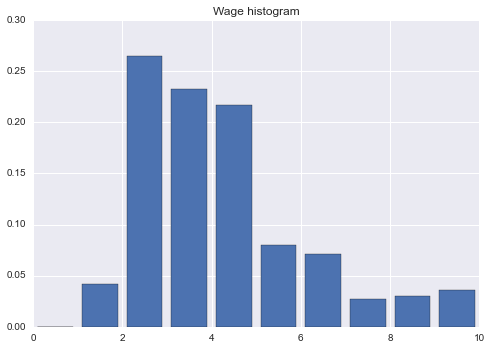

In [6]:
bins = np.arange(math.ceil(stats_wage['min'])-1,math.ceil(stats_wage['max'])+1)
pl.figure()
pl.hist(datas[:,7], bins, normed=1, histtype='bar', rwidth=0.8)
pl.title("Wage histogram")
pl.show()

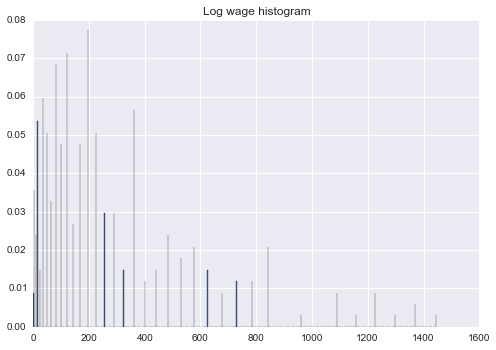

In [7]:
stats_wage_log = descriptivStats(datas[:,21])
bins2 = np.arange(math.ceil(stats_wage_log['min']),math.ceil(stats_wage_log['max'])+1)
pl.figure()
pl.hist(datas[:,21], bins2, normed=1, histtype='bar', rwidth=0.8)
pl.title("Log wage histogram")
pl.show()

## Question 4

In [9]:
#Pearson correlation
#return (Pearson’s correlation coefficient,2-tailed p-value)
correlation1 = stats.pearsonr(datas[:,15],datas[:,16])
print correlation1

(0.039960377842893247, 0.46536098227068812)


## Question 5

In [ ]:
#wage vs educ
pl.figure()
pl.scatter(datas[:,6],datas[:,7])
pl.xlabel('educ')
pl.ylabel('wage')
pl.title('wage vs educ')
pl.show()

In [ ]:
#wage vs exper
pl.figure()
pl.scatter(datas[:,19],datas[:,7])
pl.xlabel('exper')
pl.ylabel('wage')
pl.title('wage vs exper')
pl.show()

In [ ]:
#wage vs fatheduc
pl.figure()
pl.scatter(datas[:,16],datas[:,7])
pl.xlabel('fatheduc')
pl.ylabel('wage')
pl.title('wage vs fatheduc')
pl.show()